In [49]:
import csv
leverage_file_path = '/Users/noahjillson/Desktop/MCM/finals_player1_leverage.csv'
matches_file_path = '/Users/noahjillson/Desktop/MCM/Wimbledon_featured_matches.csv'

leverages = []
with open(leverage_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        leverages.append(row)

matches = []
with open(matches_file_path, 'r') as file:
    csv_reader = csv.DictReader(file)

    for row in csv_reader:
        matches.append(row)

## Extracting match information for Alcaraz Vs Djokovic

In [114]:
Alcaraz_vs_Djokovic = []
for r in matches:
    if r['player1'] == 'Carlos Alcaraz' and r['player2'] == 'Novak Djokovic':
        Alcaraz_vs_Djokovic.append(r)

len(Alcaraz_vs_Djokovic)

334

## Defining Momentum

\begin{equation}
    y_t = \frac{x_t + (1-\alpha)x_{t-1} + (1-\alpha)^2x_{t-2} + \cdots + (1-\alpha)^tx_0}{1 + (1-\alpha) + (1-\alpha)^2 + \cdots + (1-\alpha)^t}
\end{equation}

In [135]:
alpha = .1

def calc_momentum(leverages):
    num = 0
    denom = 0
    k = len(leverages)

    for t, x in enumerate(leverages):
        num += x * (1 - alpha) ** (k - t)
        denom += (1 - alpha) ** (k - t)
        
    return num / denom


## Calculation Momentum From Leverage

In [136]:
p1 = Alcaraz_vs_Djokovic[0]['player1']
p2 = Alcaraz_vs_Djokovic[0]['player2']

Alcaraz = '1'
Djokovic = '2'

print(f'player1:    {p1}')
print(f'player2:    {p2}')

player1:    Carlos Alcaraz
player2:    Novak Djokovic


In [137]:
signed_leverage = []
for r, l in zip(Alcaraz_vs_Djokovic, leverages):
    if r['point_victor'] == Alcaraz:
        signed_leverage.append(float(l['Leverage']))
    else:
        signed_leverage.append(-float(l['Leverage']))

print(signed_leverage)

[-0.112682178, 0.120175265, 0.133531852, -0.222402442, 0.185529634, -0.178468719, -0.128340151, 0.096981, -0.162377598, -0.123991304, -0.059490129, -0.044540653, -0.030423773, 0.011988641, 0.05193693, -0.098285321, -0.076536788, 0.033811251, 0.049441752, -0.084450547, -0.06737489, -0.046206429, -0.038955205, 0.015887075, -0.031017359, -0.01609479, 0.006507082, 0.028413909, -0.032237705, -0.028413909, -0.005811984, -0.00389205, 0.002545852, -0.005678924, -0.003682226, 0.002451529, 0.006202138, -0.016404307, -0.006218536, 0.002479996, 0.006251346, -0.009313244, -0.006416259, -0.004350487, -0.005384447, 0.00374134, -0.005957513, 0.003894978, 0.006242395, 0.008804852, 0.014438634, 0.023288501, -0.053301819, -0.034201034, -0.024171507, 0.013720571, 0.037391507, -0.054255256, 0.031600287, 0.054255256, -0.086273977, 0.068202062, 0.088658418, -0.106866993, 0.108382507, -0.13248398, -0.108382507, -0.039096601, 0.021180578, 0.050518502, -0.055335933, -0.045368331, 0.033781305, -0.055098509, -0.0

In [138]:
momentum = []
for n in range(1, len(signed_leverage)):
    momentum.append(calc_momentum(signed_leverage[:n]))

for m in momentum:
    print(m)

-0.112682178
0.009874370947368422
0.05550443775645758
-0.025305937281767946
0.026178903450269842
-0.01749705250197307
-0.038743446954685144
-0.014912607126361107
-0.03898539902123054
-0.052036695064896096
-0.05312290156890697
-0.051926886821195756
-0.04904371077122964
-0.041130093882877646
-0.029410413163486637
-0.03786445495971968
-0.04250572056128485
-0.0335262535840463
-0.023933632105515686
-0.030822897425106837
-0.034927183517985454
-0.036178315947304036
-0.03648300966854136
-0.030792053902524215
-0.030816326970971104
-0.029242486128217594
-0.025446811854637978
-0.01976329421898538
-0.021072395659723096
-0.021839046198063344
-0.020172768064162773
-0.01848680563872814
-0.01631646964662931
-0.015222282634832243
-0.014038648775233505
-0.01235162505325974
-0.010457851427942843
-0.011063549770706855
-0.010570958466519316
-0.009246283149064677
-0.0076756261060537175
-0.007841372294202406
-0.00769730864093375
-0.007359349033348726
-0.0071601199659720866
-0.006061342891728776
-0.0060508859

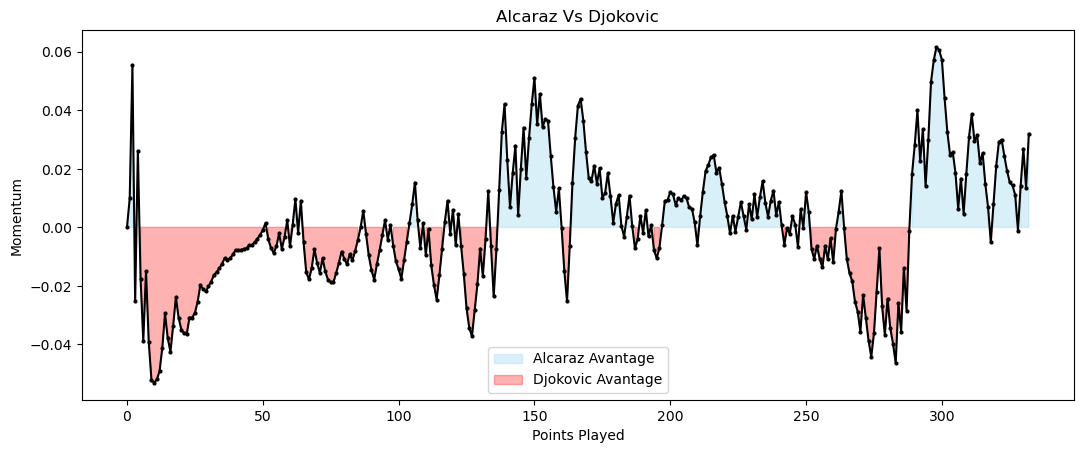

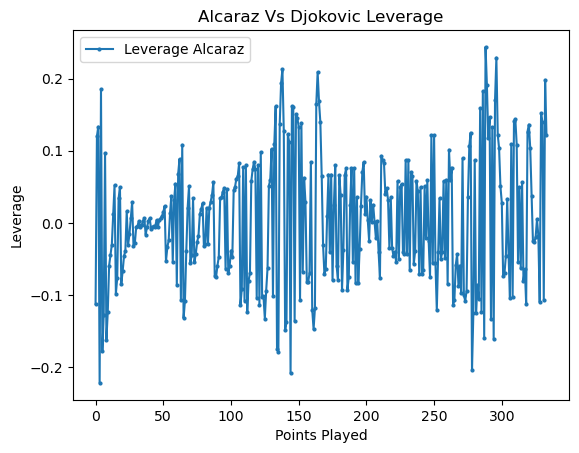

In [139]:
import matplotlib.pyplot as plt
import numpy as np

momentum[0] = 0

momentum_Djokovic = list(map(lambda x: -x, momentum))
plt.plot(momentum, marker='o', markersize=2, color='black')
#plt.plot(momentum_Djokovic, label='Djokovic', marker='o', markersize=2)


plt.fill_between(np.arange(len(momentum)), momentum, where=[x >= 0 for x in momentum], color='skyblue', alpha=0.3, label='Alcaraz Avantage')
plt.fill_between(np.arange(len(momentum)), momentum, where=[x < 0 for x in momentum], color='red', alpha=0.3, label='Djokovic Avantage')
#plt.fill_between(np.arange(len(momentum_Djokovic)), momentum_Djokovic, color='red', alpha=0.3, label='Djokovic Avantage')

# Adding labels and title
plt.xlabel('Points Played')
plt.ylabel('Momentum')
plt.title('Alcaraz Vs Djokovic')

# Adding legend
plt.legend()

fig = plt.gcf()

# Get the current size of the figure
fig_size = fig.get_size_inches()

# Double the width
fig.set_size_inches(fig_size[0] * 2, fig_size[1])

plt.show()

plt.plot(signed_leverage, label='Leverage Alcaraz', marker='o', markersize=2)

plt.xlabel('Points Played')
plt.ylabel('Leverage')
plt.title('Alcaraz Vs Djokovic Leverage')

plt.legend()
plt.show()